In [1]:
import numpy as np
import sklearn
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.callbacks import LearningRateScheduler
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.callbacks import History
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import History
from keras.wrappers.scikit_learn import KerasClassifier
import pandas as pd
import os
import warnings

print(tf.__version__)
print(keras.__version__)

2.9.0
2.9.0


In [ ]:
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
PATH = os.path.join("data", "bank-additional", "bank-additional")

In [3]:
def load_data(filename, path=PATH):
    csv_path = os.path.join(path, filename)
    return pd.read_csv(csv_path,sep=';')

In [4]:
full_data = load_data("bank-additional-full.csv")

In [5]:
full_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
full_data.shape

(41188, 21)

In [7]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
full_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
full_data.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
full_data[full_data.duplicated()].shape

(12, 21)

In [11]:
def unknown_number(row):
    out=0
    for col in row:
        if col == 'unknown':
            out=out+1
    return out
def null_number(row):
    out=0
    for col in row:
        if pd.isnull(col):
            out=out+1
    return out

In [12]:
full_data['unknowns']=full_data.apply(lambda x:unknown_number(x), axis=1)
print(full_data['unknowns'].value_counts())

0    30488
1     9034
2     1338
3      306
4       20
5        2
Name: unknowns, dtype: int64


In [13]:
print(full_data.shape)
full_data.drop(full_data[full_data.apply(lambda x:unknown_number(x), axis=1)>=3].index, inplace=True)
print(full_data.shape)

(41188, 22)
(40860, 22)


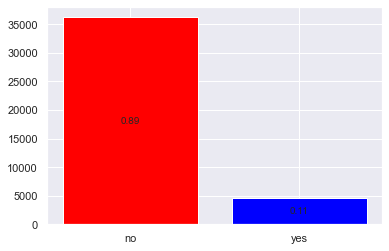

In [14]:
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8,6)})
a=full_data['y'].value_counts()
b=full_data['y'].value_counts(normalize=True)
b=b.apply(lambda x: round(x, 2))

height = a.values
bars = a.index
x_pos = np.arange(len(bars))

er=plt.bar(x_pos, height, color=('red','blue'))

plt.xticks(x_pos, bars)

plt.bar_label(er, labels=b,label_type='center')

plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
full_data['y'] = label_encoder.fit_transform(full_data['y'])

In [16]:
categorical_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_columns=['age', 'pdays', 'previous', 'duration','campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

-----------------------------
job
               counts    no   yes  rate
admin.          10391  9039  1352  0.13
blue-collar      9160  8524   636  0.07
technician       6712  5985   727  0.11
services         3948  3627   321  0.08
management       2912  2584   328  0.11
retired          1707  1275   432  0.25
entrepreneur     1449  1326   123  0.08
self-employed    1408  1260   148  0.11
housemaid        1047   942   105  0.10
unemployed       1006   863   143  0.14
student           870   598   272  0.31
unknown           250   220    30  0.12


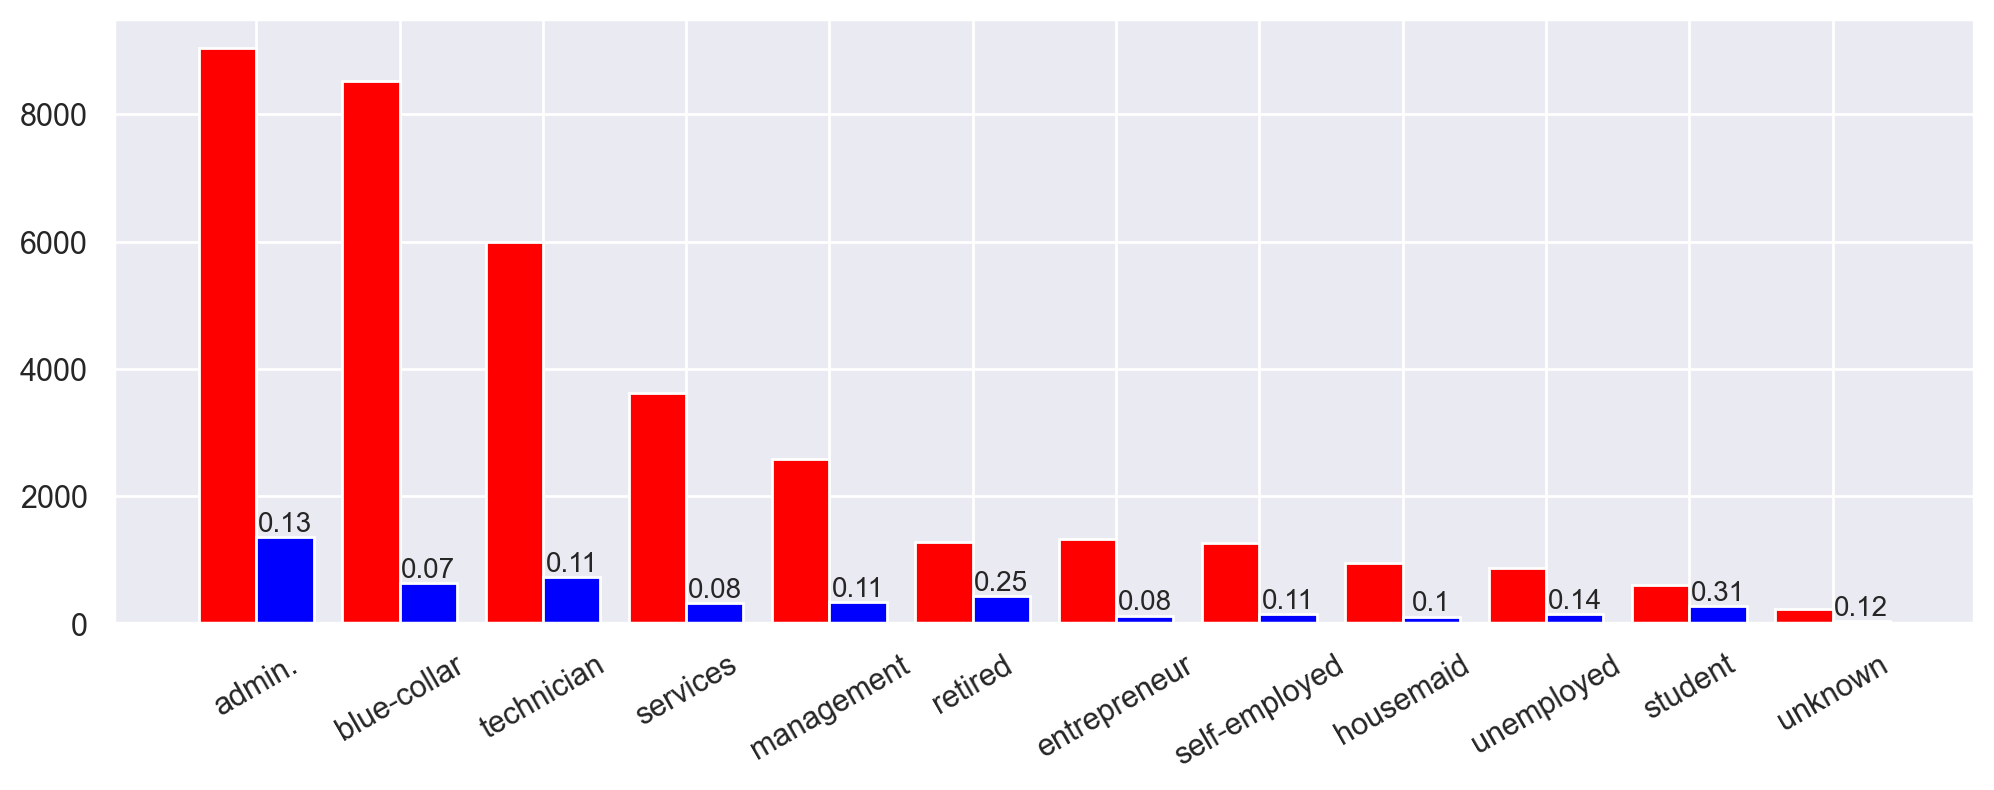

-----------------------------
marital
          counts     no   yes  rate
married    24699  22179  2520  0.10
single     11503   9888  1615  0.14
divorced    4586   4114   472  0.10
unknown       72     62    10  0.14


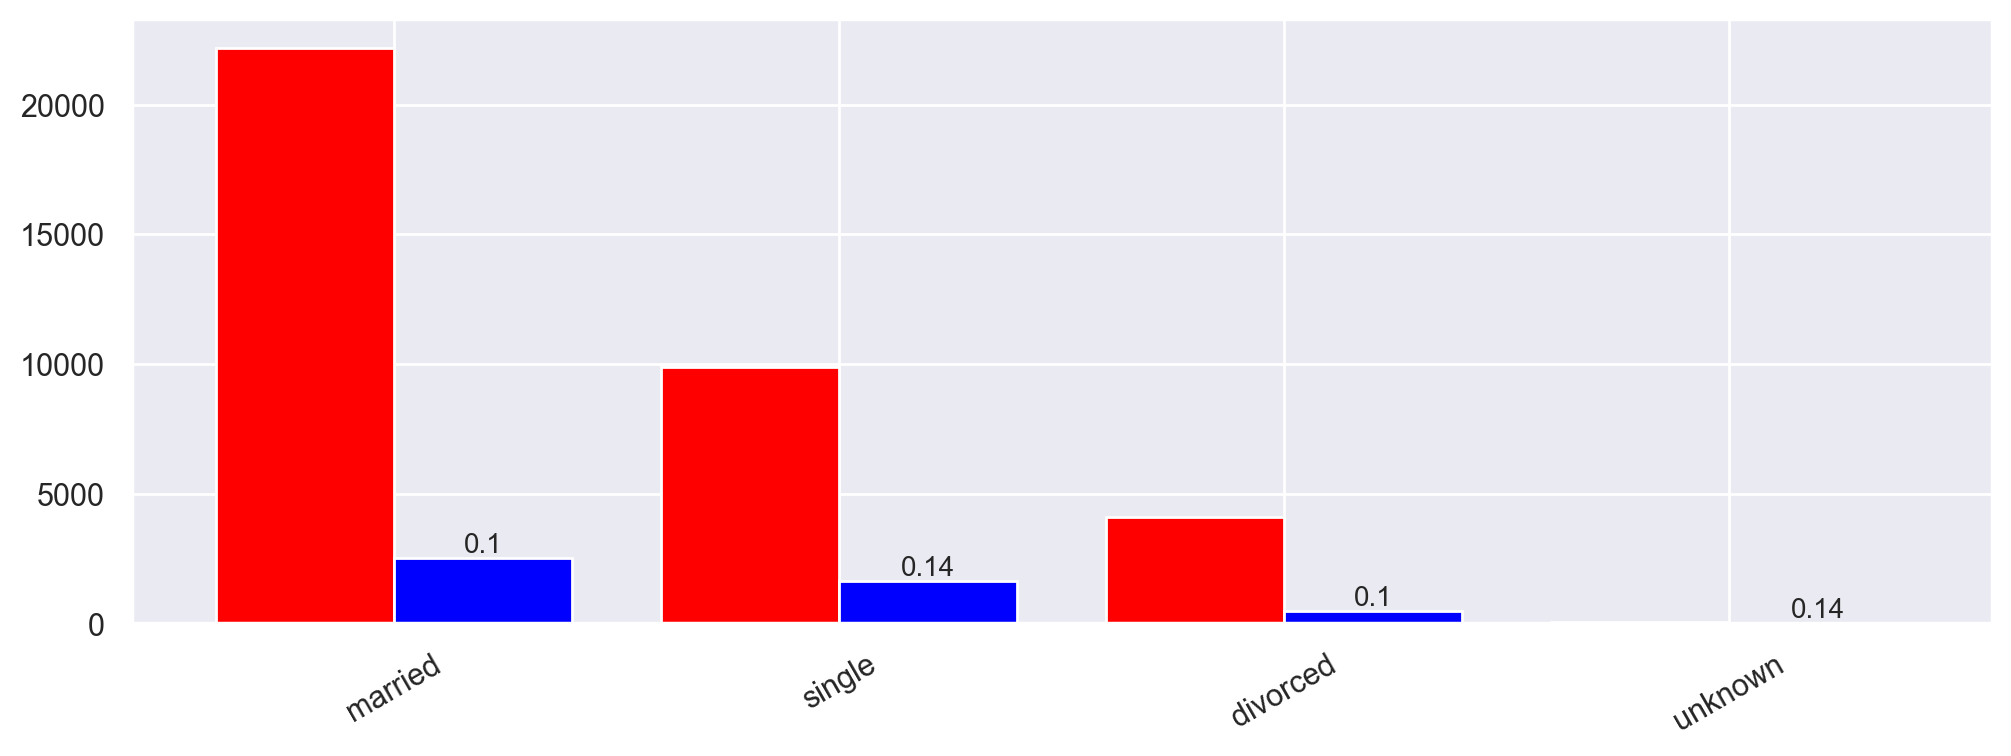

-----------------------------
education
                     counts     no   yes  rate
university.degree     12128  10460  1668  0.14
high.school            9481   8452  1029  0.11
basic.9y               6007   5534   473  0.08
professional.course    5223   4629   594  0.11
basic.4y               4121   3695   426  0.10
basic.6y               2268   2084   184  0.08
unknown                1614   1375   239  0.15
illiterate               18     14     4  0.22


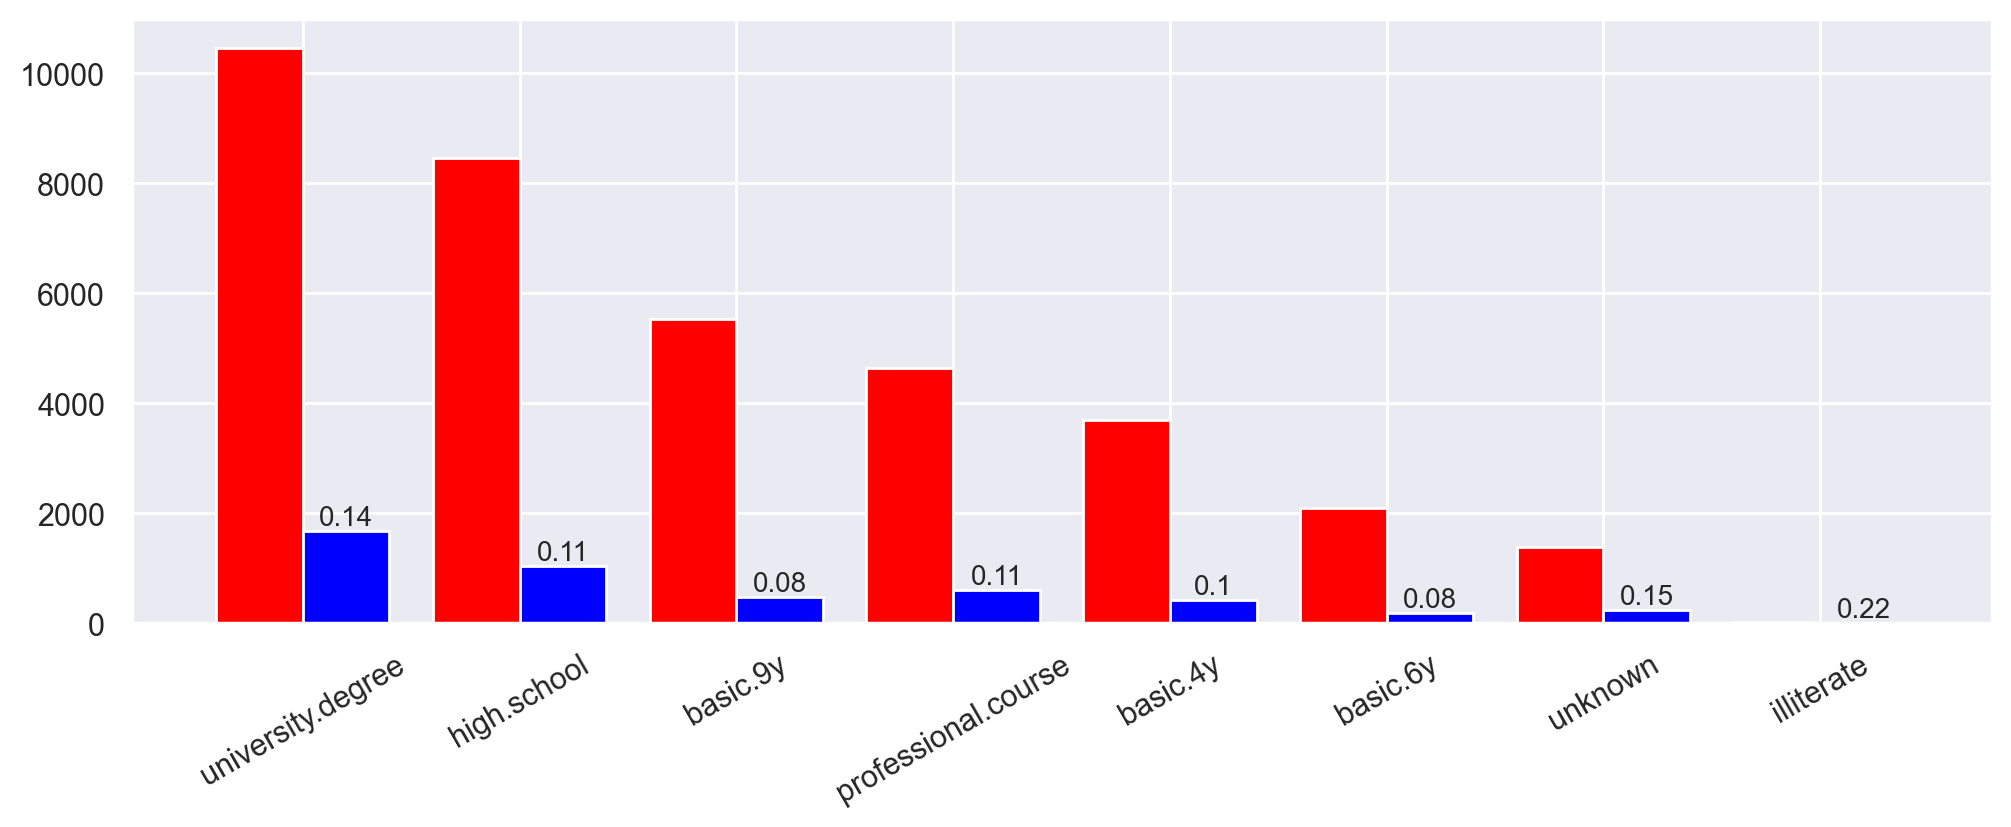

-----------------------------
default
         counts     no   yes  rate
no        32561  28371  4190  0.13
unknown    8296   7869   427  0.05
yes           3      3     0  0.00


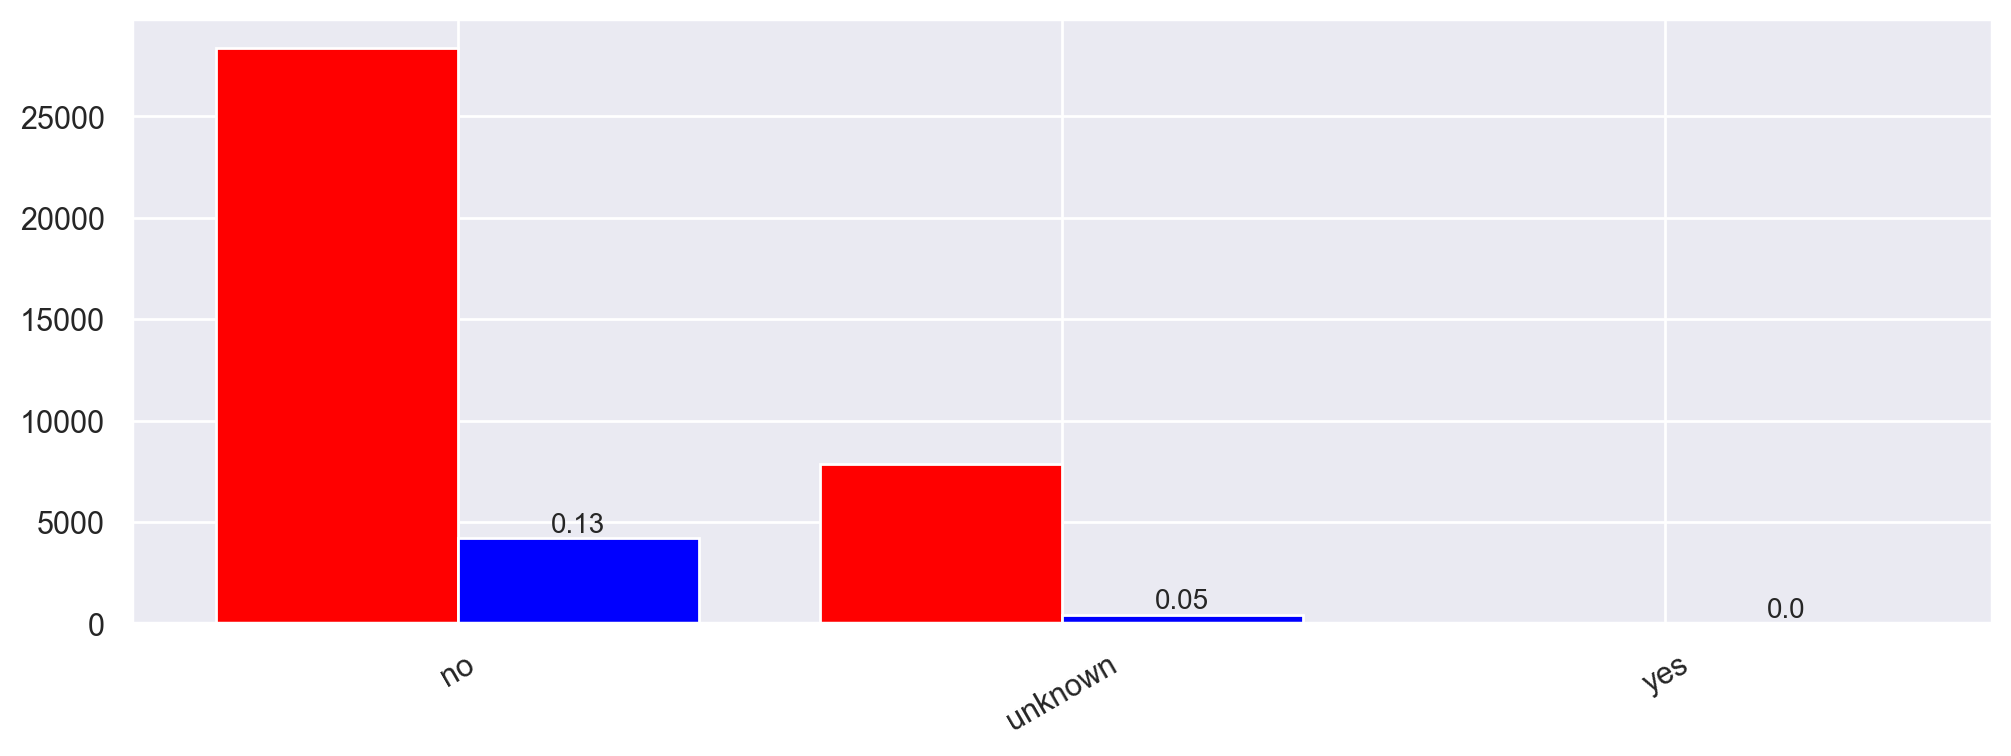

-----------------------------
housing
         counts     no   yes  rate
yes       21527  19026  2501  0.12
no        18594  16569  2025  0.11
unknown     739    648    91  0.12


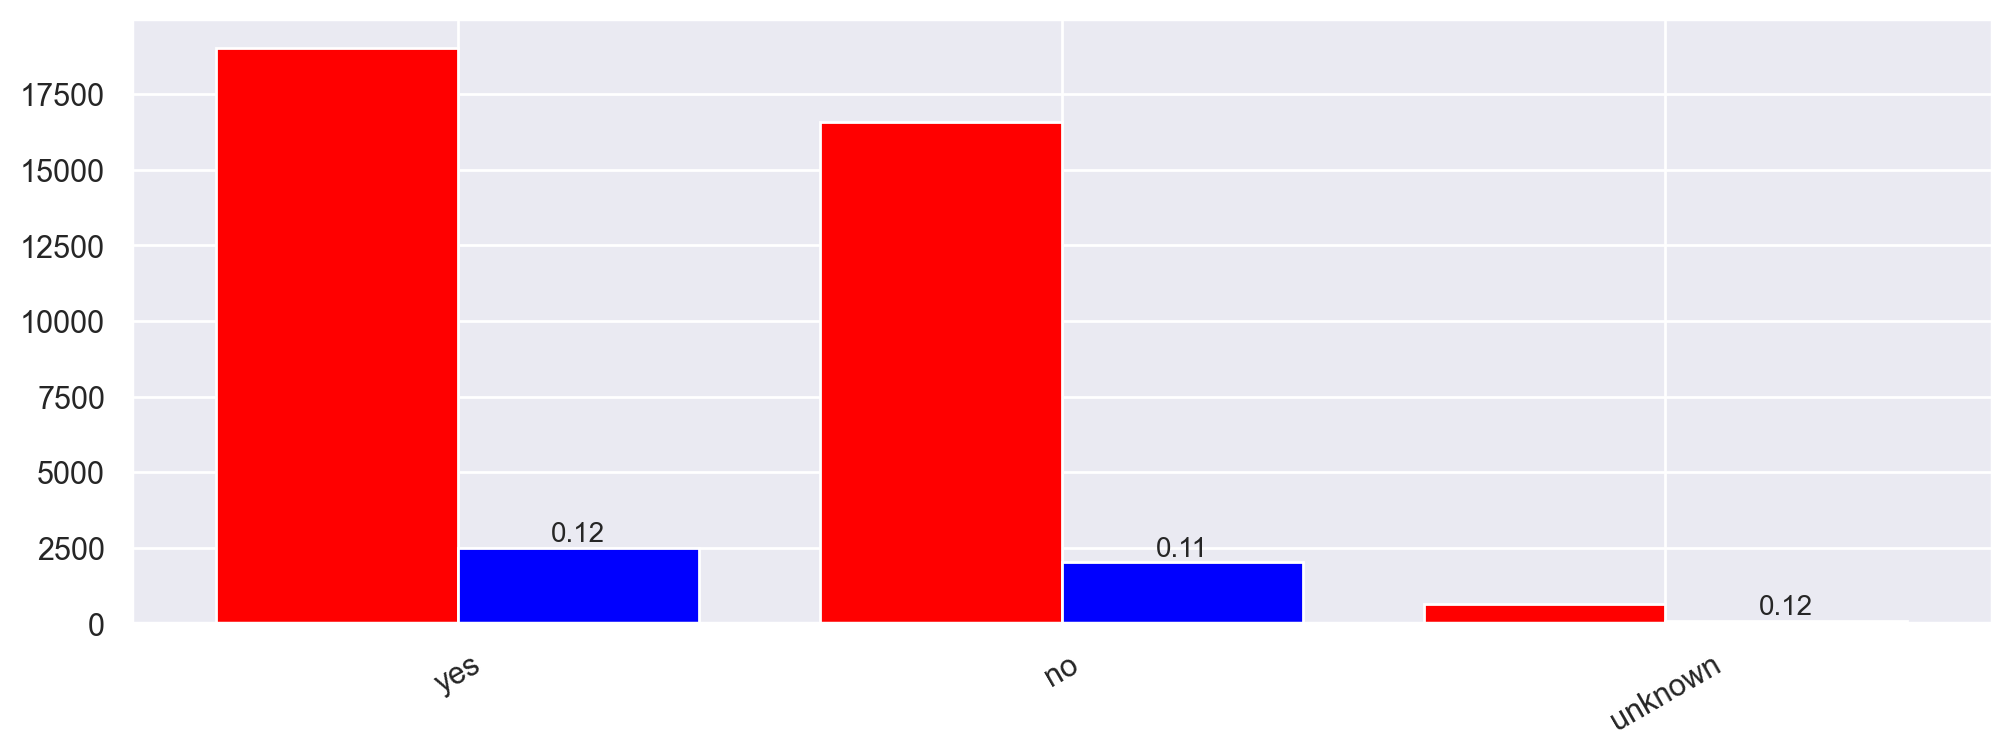

-----------------------------
loan
         counts     no   yes  rate
no        33879  30034  3845  0.11
yes        6242   5561   681  0.11
unknown     739    648    91  0.12


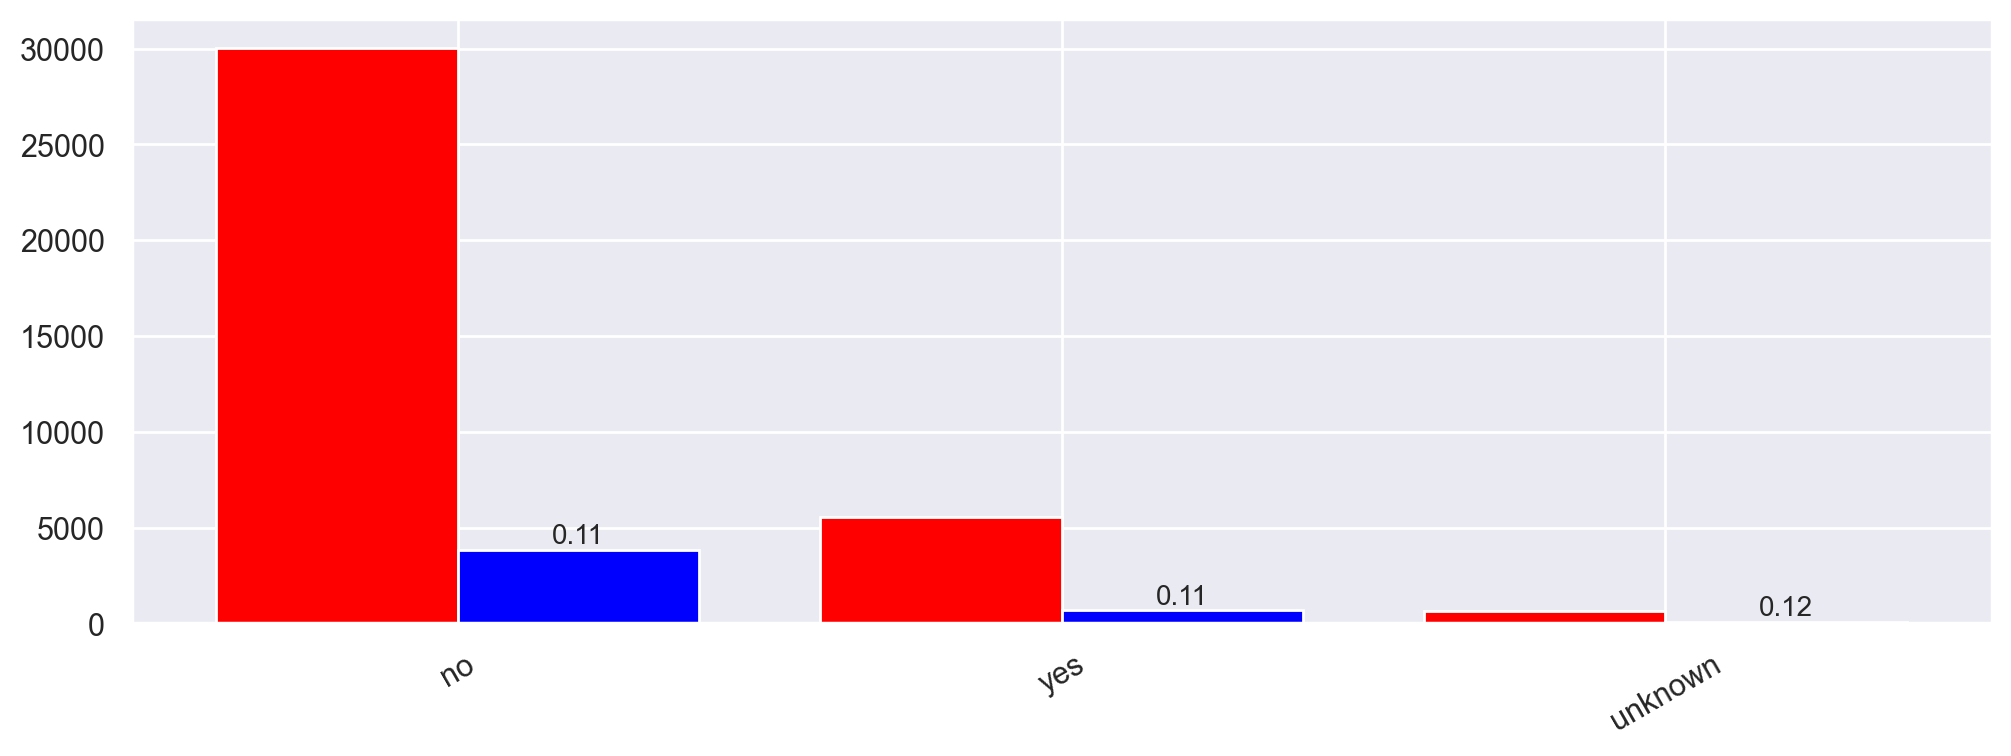

-----------------------------
contact
           counts     no   yes  rate
cellular    26007  22171  3836  0.15
telephone   14853  14072   781  0.05


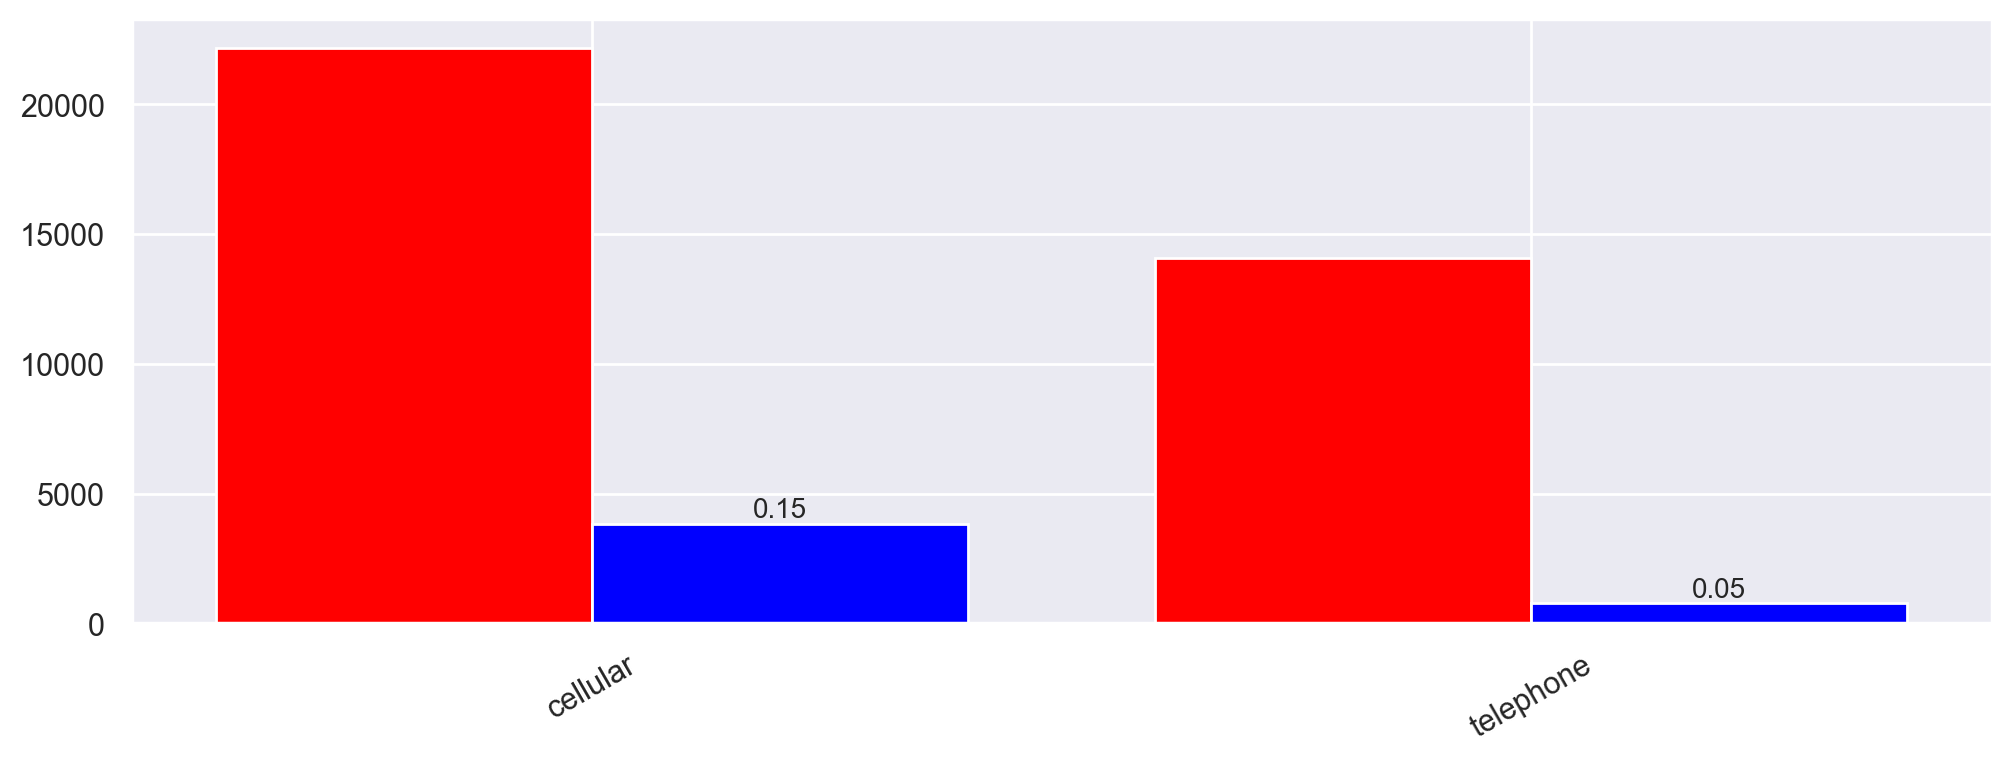

-----------------------------
month
     counts     no  yes  rate
may   13630  12749  881  0.06
jul    7116   6472  644  0.09
aug    6135   5483  652  0.11
jun    5256   4698  558  0.11
nov    4090   3677  413  0.10
apr    2625   2088  537  0.20
oct     716    402  314  0.44
sep     567    313  254  0.45
mar     544    269  275  0.51
dec     181     92   89  0.49


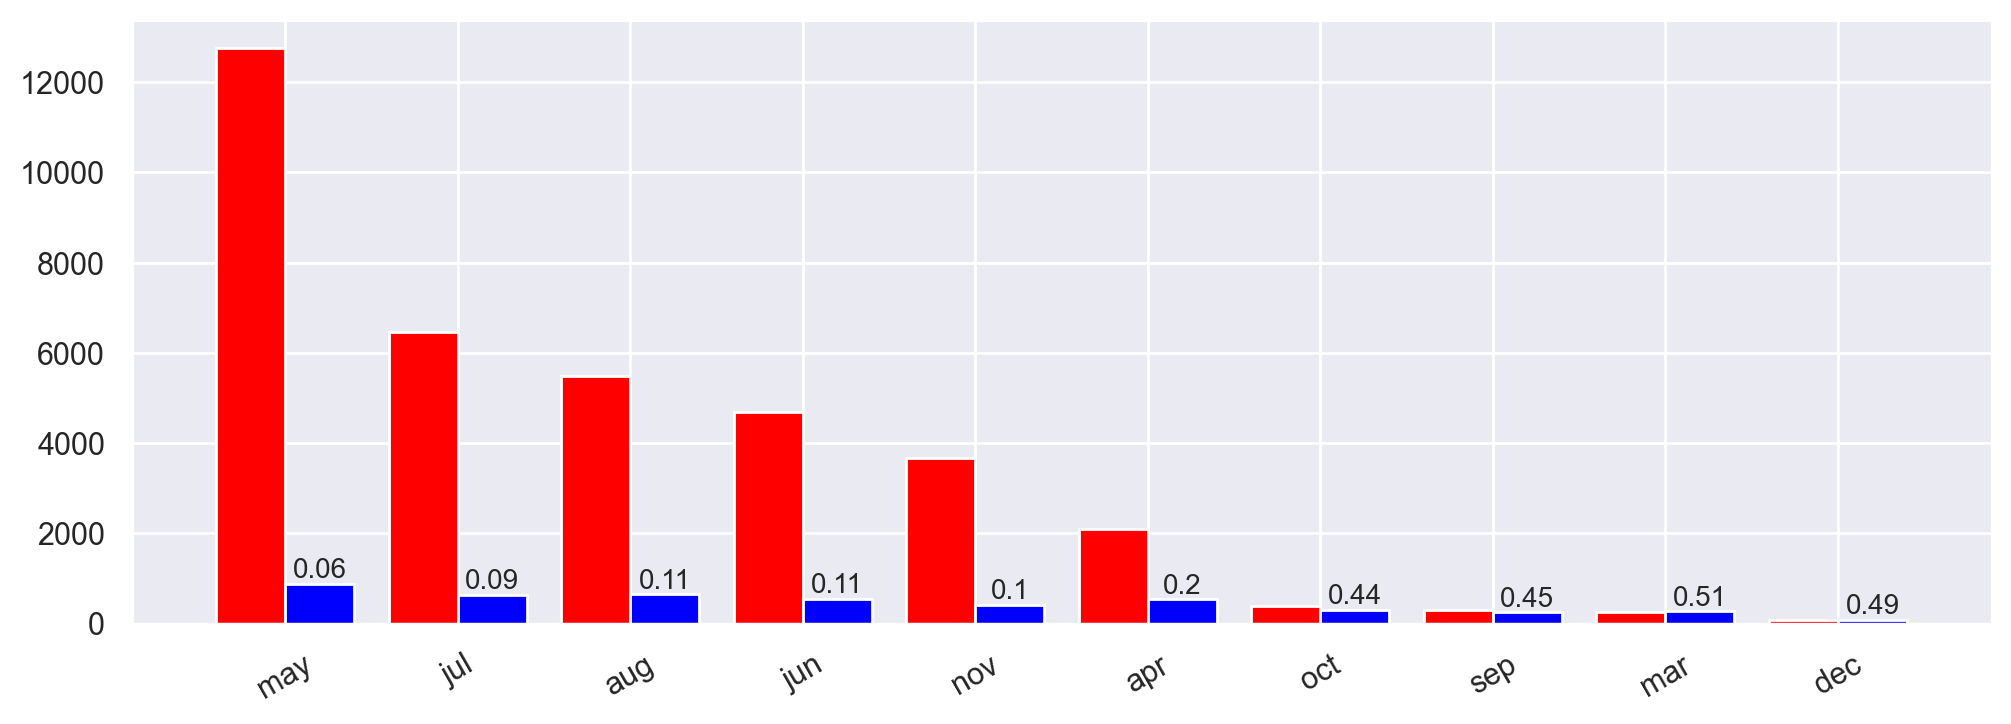

-----------------------------
day_of_week
     counts    no   yes  rate
thu    8573  7529  1044  0.12
mon    8444  7603   841  0.10
wed    8065  7123   942  0.12
tue    8023  7075   948  0.12
fri    7755  6913   842  0.11


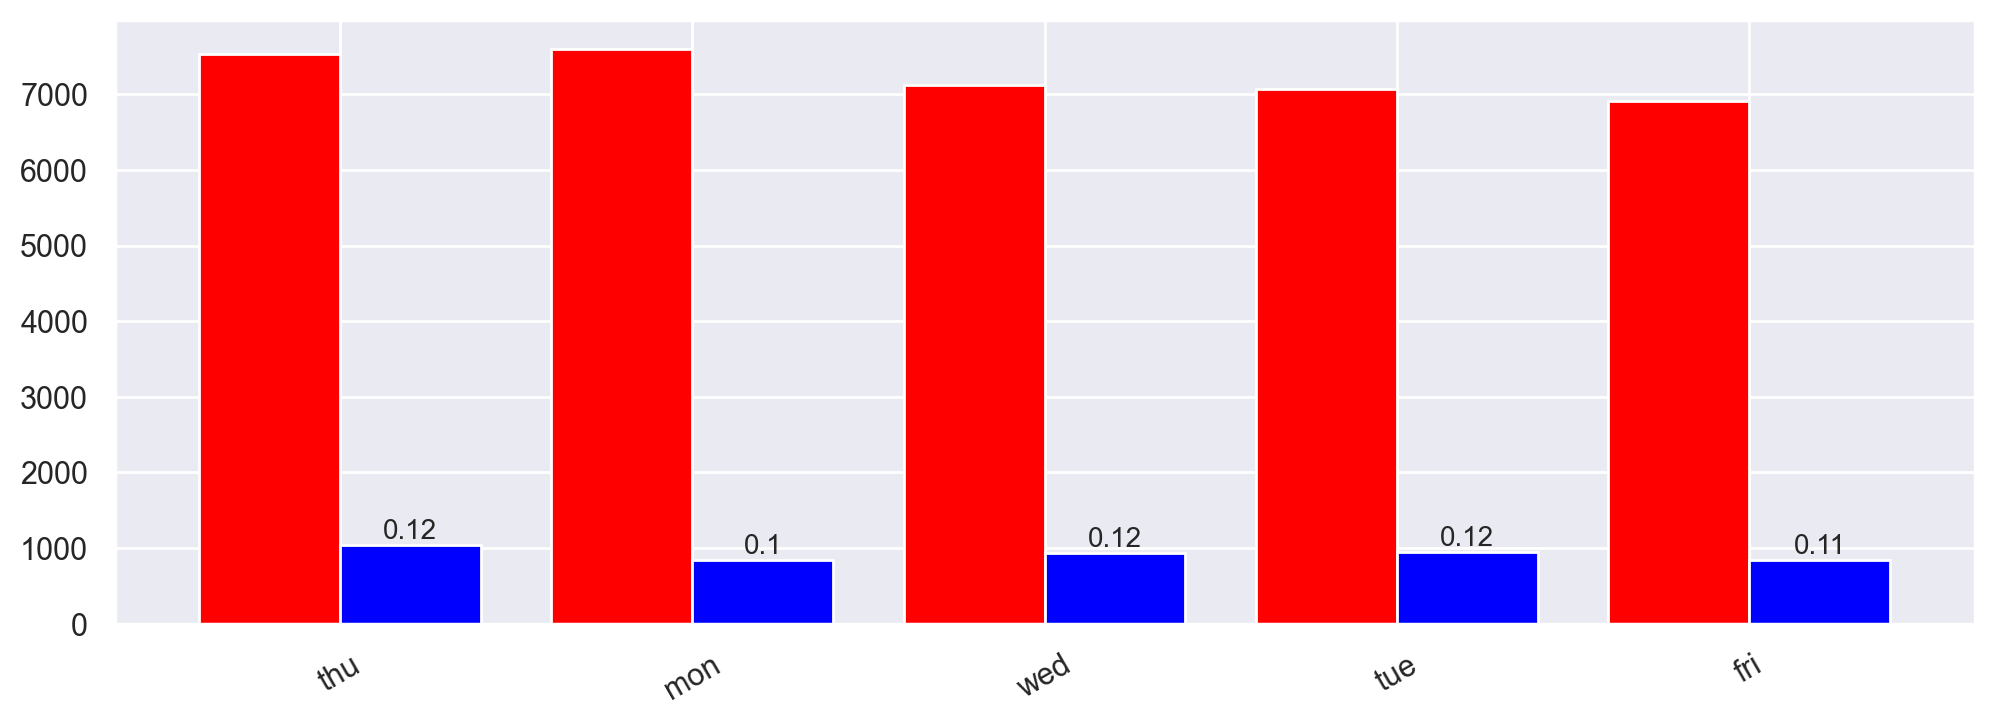

-----------------------------
poutcome
             counts     no   yes  rate
nonexistent   35257  32130  3127  0.09
failure        4234   3635   599  0.14
success        1369    478   891  0.65


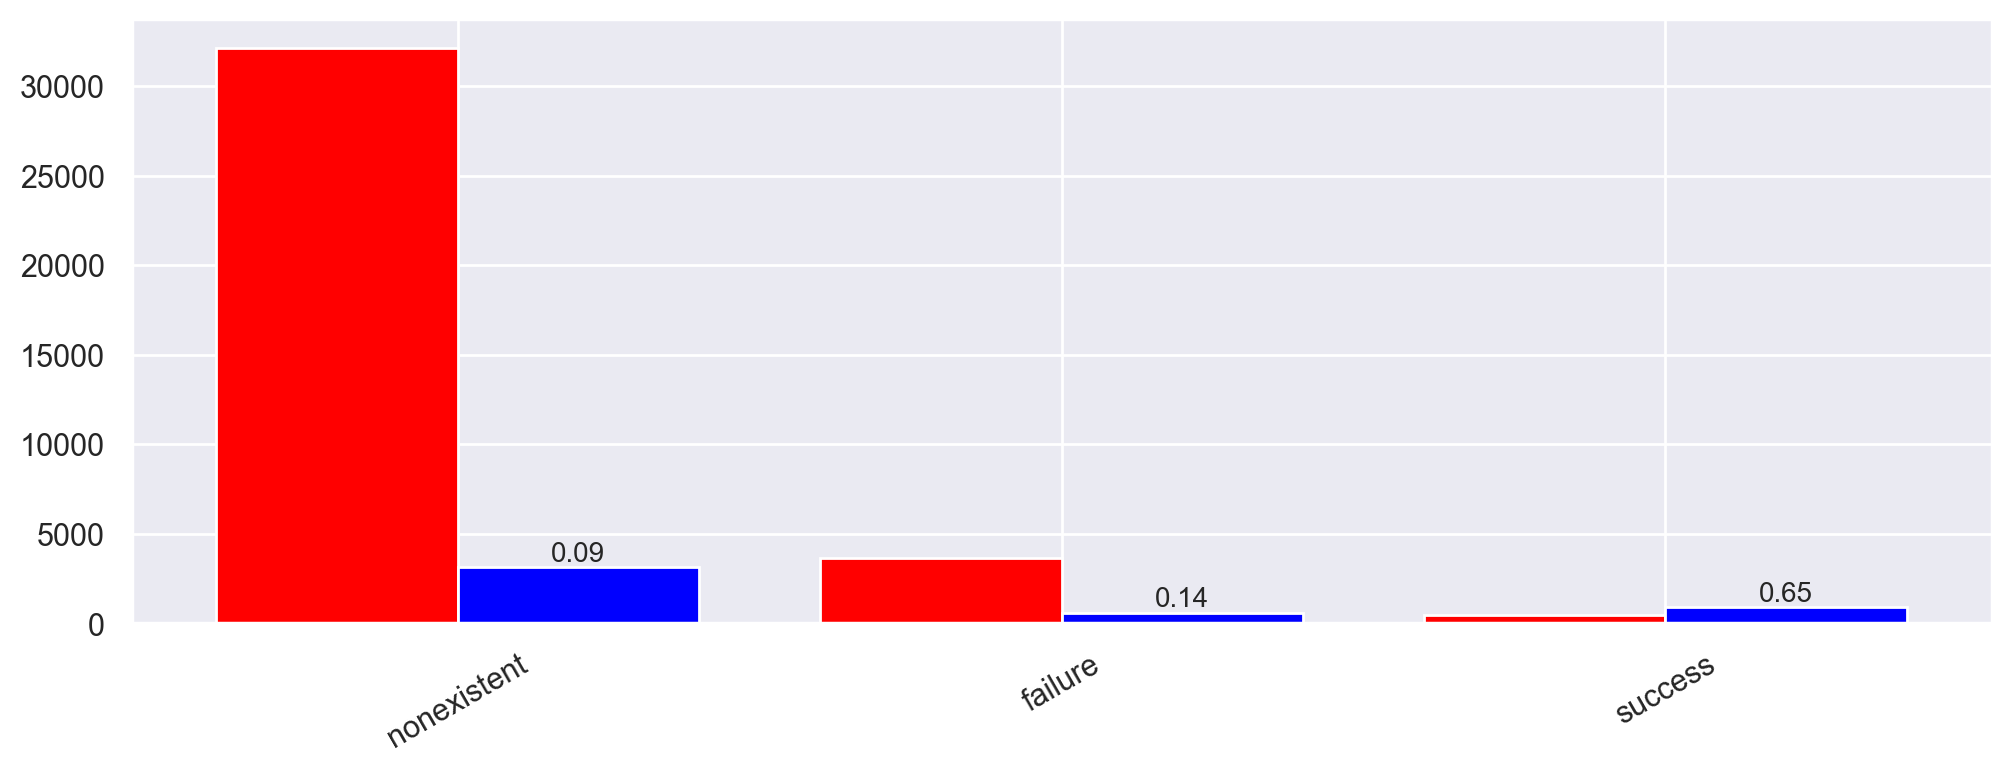

In [17]:
def display_categorical(name):
    print("-----------------------------")
    print(name)
    to_display = pd.DataFrame()
    to_display['counts']=full_data[name].value_counts()

    to_display['no'] = to_display.apply (lambda row: len(full_data[(full_data[name]==row.name) & (full_data['y']==0)].index), axis=1)
    to_display['yes'] = to_display.apply (lambda row: len(full_data[(full_data[name]==row.name) & (full_data['y']==1)].index), axis=1)
    to_display['rate'] = to_display.apply (lambda row: round((row['yes']/row['counts']), 2), axis=1)
    print(to_display)

    height_b =  to_display['no'].values
    height_c =  to_display['yes'].values
    bars =  to_display.index
    x_pos = np.arange(len(bars))

    plt.figure(figsize=(12, 4), dpi=200)
    er_b=plt.bar(x_pos - 0.2, height_b, 0.4, color='red',label = 'Girls')
    er_c=plt.bar(x_pos + 0.2, height_c, 0.4, color='blue',label = 'Girls')

    plt.bar_label(er_c, labels=to_display['rate'])

    plt.xticks(x_pos, bars,rotation=30)
    plt.show()

for n in categorical_columns:
    display_categorical(n)

age: 
              range  population  sway
0   (16.919, 21.05]         240  0.35
1     (21.05, 25.1]        1418  0.18
2     (25.1, 29.15]        3987  0.14
3     (29.15, 33.2]        7309  0.11
4     (33.2, 37.25]        6734  0.10
5     (37.25, 41.3]        5237  0.09
6     (41.3, 45.35]        4268  0.08
7     (45.35, 49.4]        3735  0.08
8     (49.4, 53.45]        3093  0.10
9     (53.45, 57.5]        2638  0.10
10    (57.5, 61.55]        1372  0.16
11    (61.55, 65.6]         216  0.42
12    (65.6, 69.65]         147  0.46
13    (69.65, 73.7]         167  0.39
14    (73.7, 77.75]         110  0.52
15    (77.75, 81.8]          90  0.50
16    (81.8, 85.85]          56  0.52
17    (85.85, 89.9]          33  0.52
18    (89.9, 93.95]           6  0.50
19    (93.95, 98.0]           4  0.50
----


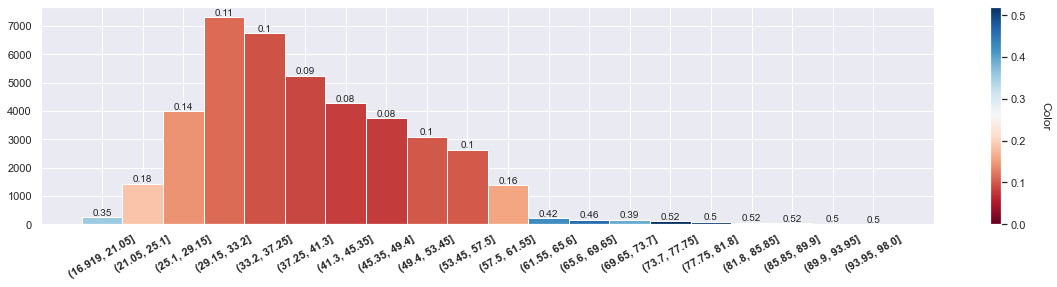

pdays: 
              range  population  sway
0   (-0.999, 49.95]        1511  0.64
1     (49.95, 99.9]           0   NaN
2    (99.9, 149.85]           0   NaN
3   (149.85, 199.8]           0   NaN
4   (199.8, 249.75]           0   NaN
5   (249.75, 299.7]           0   NaN
6   (299.7, 349.65]           0   NaN
7   (349.65, 399.6]           0   NaN
8   (399.6, 449.55]           0   NaN
9   (449.55, 499.5]           0   NaN
10  (499.5, 549.45]           0   NaN
11  (549.45, 599.4]           0   NaN
12  (599.4, 649.35]           0   NaN
13  (649.35, 699.3]           0   NaN
14  (699.3, 749.25]           0   NaN
15  (749.25, 799.2]           0   NaN
16  (799.2, 849.15]           0   NaN
17  (849.15, 899.1]           0   NaN
18  (899.1, 949.05]           0   NaN
19  (949.05, 999.0]       39349  0.09
----


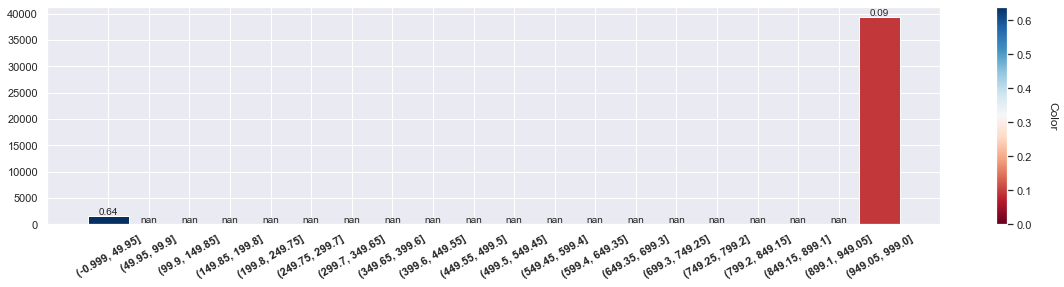

previous: 
             range  population  sway
0   (-0.007, 0.35]       35257  0.09
1      (0.35, 0.7]           0   NaN
2      (0.7, 1.05]        4543  0.21
3      (1.05, 1.4]           0   NaN
4      (1.4, 1.75]           0   NaN
5      (1.75, 2.1]         751  0.46
6      (2.1, 2.45]           0   NaN
7      (2.45, 2.8]           0   NaN
8      (2.8, 3.15]         215  0.59
9      (3.15, 3.5]           0   NaN
10     (3.5, 3.85]           0   NaN
11     (3.85, 4.2]          70  0.54
12     (4.2, 4.55]           0   NaN
13     (4.55, 4.9]           0   NaN
14     (4.9, 5.25]          18  0.72
15     (5.25, 5.6]           0   NaN
16     (5.6, 5.95]           0   NaN
17     (5.95, 6.3]           5  0.60
18     (6.3, 6.65]           0   NaN
19     (6.65, 7.0]           1  0.00
----


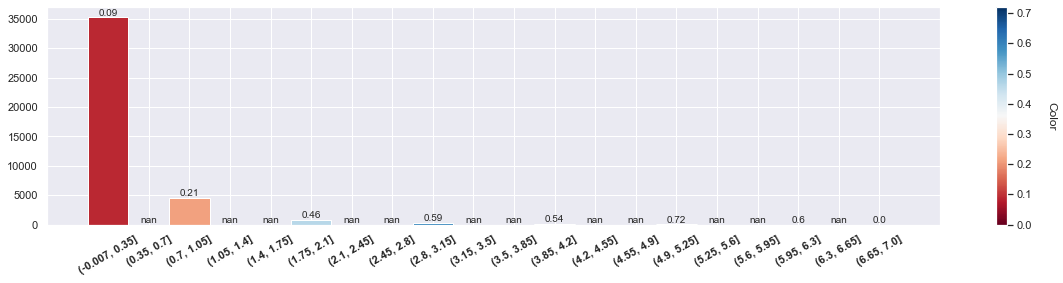

duration: 
               range  population  sway
0    (-4.918, 245.9]       26329  0.04
1     (245.9, 491.8]        9500  0.15
2     (491.8, 737.7]        2881  0.33
3     (737.7, 983.6]        1145  0.50
4    (983.6, 1229.5]         545  0.56
5   (1229.5, 1475.4]         240  0.63
6   (1475.4, 1721.3]         108  0.67
7   (1721.3, 1967.2]          46  0.50
8   (1967.2, 2213.1]          29  0.72
9   (2213.1, 2459.0]          11  0.64
10  (2459.0, 2704.9]           9  0.78
11  (2704.9, 2950.8]           2  0.50
12  (2950.8, 3196.7]           4  0.75
13  (3196.7, 3442.6]           5  0.00
14  (3442.6, 3688.5]           3  0.67
15  (3688.5, 3934.4]           1  0.00
16  (3934.4, 4180.3]           0   NaN
17  (4180.3, 4426.2]           1  1.00
18  (4426.2, 4672.1]           0   NaN
19  (4672.1, 4918.0]           1  0.00
----


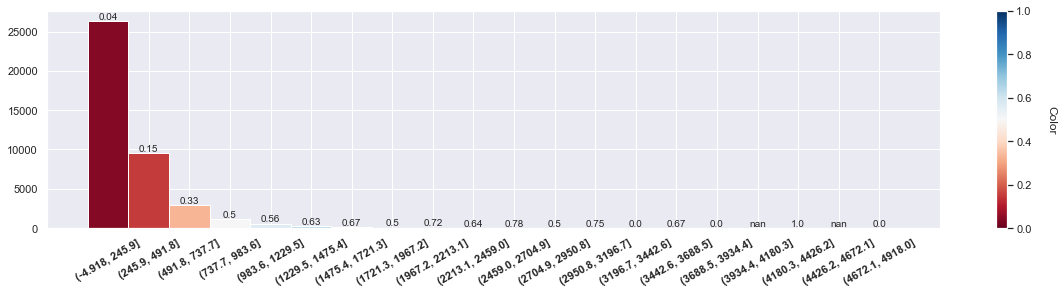

campaign: 
           range  population  sway
0   (0.958, 3.1]       33285  0.12
1     (3.1, 5.2]        4216  0.09
2     (5.2, 7.3]        1601  0.07
3     (7.3, 9.4]         674  0.05
4    (9.4, 11.5]         400  0.06
5   (11.5, 13.6]         213  0.03
6   (13.6, 15.7]         119  0.03
7   (15.7, 17.8]         108  0.04
8   (17.8, 19.9]          58  0.00
9   (19.9, 22.0]          71  0.00
10  (22.0, 24.1]          31  0.03
11  (24.1, 26.2]          16  0.00
12  (26.2, 28.3]          19  0.00
13  (28.3, 30.4]          17  0.00
14  (30.4, 32.5]          11  0.00
15  (32.5, 34.6]           7  0.00
16  (34.6, 36.7]           5  0.00
17  (36.7, 38.8]           1  0.00
18  (38.8, 40.9]           3  0.00
19  (40.9, 43.0]           5  0.00
----


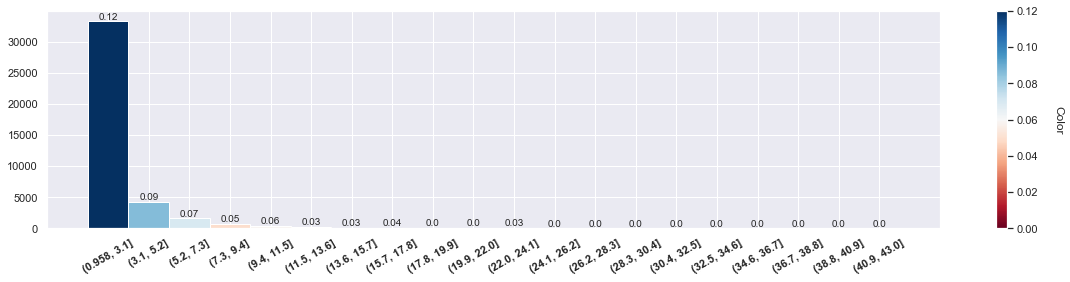

emp.var.rate: 
              range  population  sway
0   (-3.405, -3.16]        1067  0.42
1    (-3.16, -2.92]         171  0.51
2    (-2.92, -2.68]        1660  0.36
3    (-2.68, -2.44]           0   NaN
4     (-2.44, -2.2]           0   NaN
5     (-2.2, -1.96]           0   NaN
6    (-1.96, -1.72]        9153  0.16
7    (-1.72, -1.48]         771  0.52
8    (-1.48, -1.24]           0   NaN
9     (-1.24, -1.0]         632  0.47
10    (-1.0, -0.76]           0   NaN
11   (-0.76, -0.52]           0   NaN
12   (-0.52, -0.28]           0   NaN
13   (-0.28, -0.04]        3684  0.06
14     (-0.04, 0.2]           0   NaN
15      (0.2, 0.44]           0   NaN
16     (0.44, 0.68]           0   NaN
17     (0.68, 0.92]           0   NaN
18     (0.92, 1.16]        7646  0.03
19      (1.16, 1.4]       16076  0.05
----


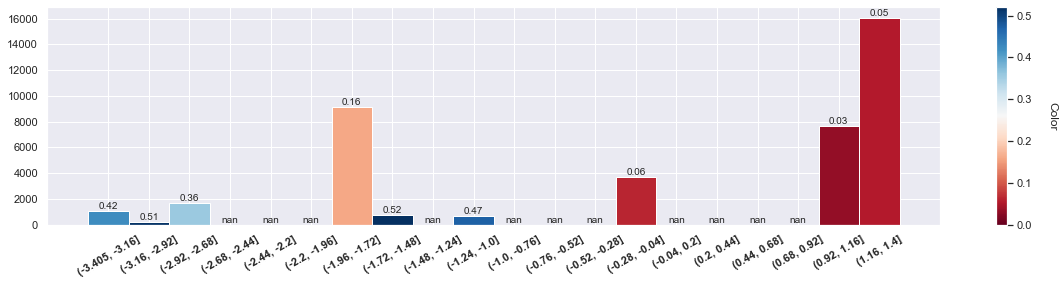

cons.price.idx: 
               range  population  sway
0   (92.198, 92.329]         768  0.34
1   (92.329, 92.458]         712  0.40
2   (92.458, 92.586]         177  0.37
3   (92.586, 92.714]         526  0.48
4   (92.714, 92.842]          10  0.10
5   (92.842, 92.971]        6768  0.13
6   (92.971, 93.099]        2451  0.18
7   (93.099, 93.227]        3607  0.05
8   (93.227, 93.356]           0   NaN
9   (93.356, 93.484]        5397  0.08
10  (93.484, 93.612]           0   NaN
11  (93.612, 93.741]           0   NaN
12  (93.741, 93.869]         241  0.58
13  (93.869, 93.997]       14488  0.05
14  (93.997, 94.126]         462  0.49
15  (94.126, 94.254]         610  0.53
16  (94.254, 94.382]           0   NaN
17   (94.382, 94.51]        4312  0.04
18   (94.51, 94.639]         203  0.45
19  (94.639, 94.767]         128  0.45
----


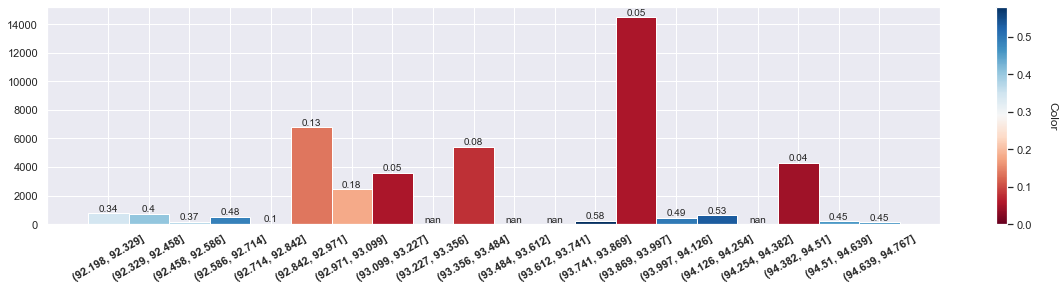

cons.conf.idx: 
                 range  population  sway
0   (-50.824, -49.605]         409  0.45
1    (-49.605, -48.41]         203  0.45
2    (-48.41, -47.215]           0   NaN
3    (-47.215, -46.02]        8223  0.12
4    (-46.02, -44.825]          10  0.10
5    (-44.825, -43.63]           0   NaN
6    (-43.63, -42.435]        6630  0.06
7    (-42.435, -41.24]        7919  0.05
8    (-41.24, -40.045]        1091  0.44
9    (-40.045, -38.85]         441  0.52
10   (-38.85, -37.655]         233  0.52
11   (-37.655, -36.46]         301  0.49
12   (-36.46, -35.265]       12780  0.04
13   (-35.265, -34.07]         437  0.57
14   (-34.07, -32.875]         348  0.44
15   (-32.875, -31.68]           0   NaN
16   (-31.68, -30.485]         768  0.34
17   (-30.485, -29.29]         621  0.44
18   (-29.29, -28.095]           0   NaN
19    (-28.095, -26.9]         446  0.40
----


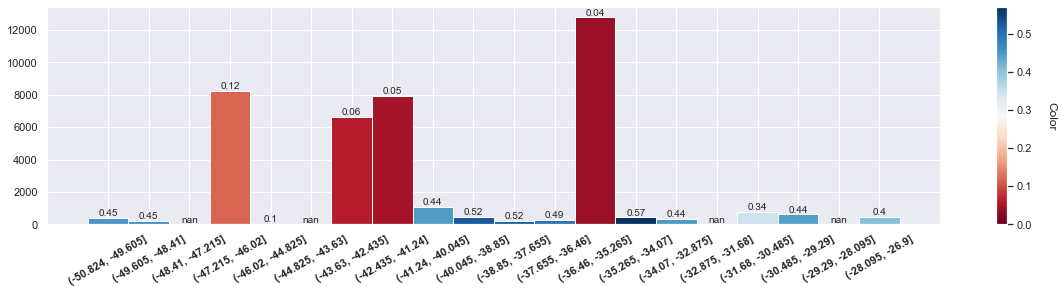

euribor3m: 
             range  population  sway
0    (0.63, 0.855]        2492  0.47
1   (0.855, 1.075]        1736  0.43
2   (1.075, 1.296]        3864  0.15
3   (1.296, 1.516]        5092  0.13
4   (1.516, 1.737]         202  0.45
5   (1.737, 1.957]          68  0.46
6   (1.957, 2.178]           0   NaN
7   (2.178, 2.398]           0   NaN
8   (2.398, 2.619]           0   NaN
9   (2.619, 2.839]           0   NaN
10   (2.839, 3.06]           1  1.00
11   (3.06, 3.281]           0   NaN
12  (3.281, 3.501]           4  0.00
13  (3.501, 3.722]           3  0.00
14  (3.722, 3.942]           6  0.00
15  (3.942, 4.163]        2937  0.05
16  (4.163, 4.383]         634  0.04
17  (4.383, 4.604]          13  0.38
18  (4.604, 4.824]          27  0.48
19  (4.824, 5.045]       23781  0.05
----


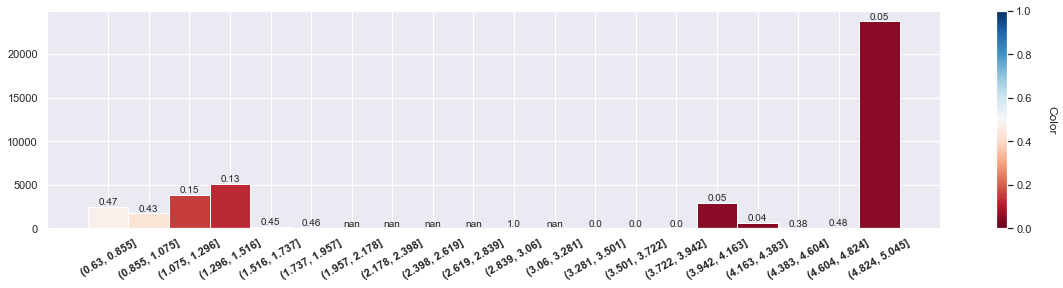

nr.employed: 
                   range  population  sway
0   (4963.336, 4976.825]         632  0.47
1    (4976.825, 4990.05]           0   NaN
2    (4990.05, 5003.275]         771  0.52
3     (5003.275, 5016.5]         649  0.57
4     (5016.5, 5029.725]        1238  0.44
5    (5029.725, 5042.95]           0   NaN
6    (5042.95, 5056.175]           0   NaN
7     (5056.175, 5069.4]           0   NaN
8     (5069.4, 5082.625]        1660  0.36
9    (5082.625, 5095.85]           0   NaN
10   (5095.85, 5109.075]        8504  0.13
11    (5109.075, 5122.3]           0   NaN
12    (5122.3, 5135.525]           0   NaN
13   (5135.525, 5148.75]           0   NaN
14   (5148.75, 5161.975]           0   NaN
15    (5161.975, 5175.2]           0   NaN
16    (5175.2, 5188.425]          10  0.10
17   (5188.425, 5201.65]       11320  0.04
18   (5201.65, 5214.875]           0   NaN
19    (5214.875, 5228.1]       16076  0.05
----


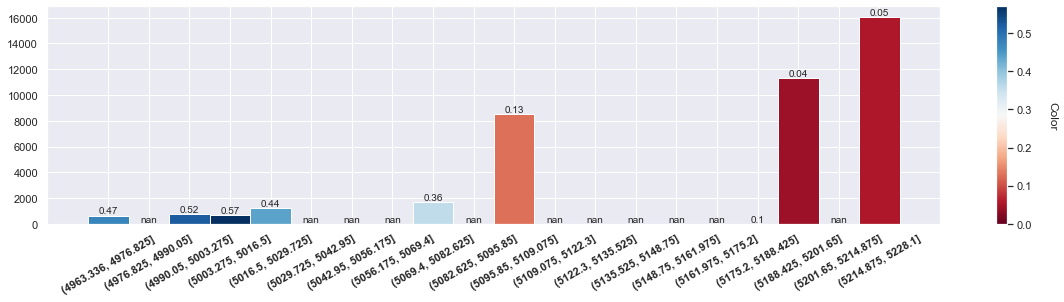

In [18]:
from matplotlib.cm import ScalarMappable

def dis2(name):
    print(name+": ")
    new_name=name+"_band"
    full_data[new_name] = pd.cut(full_data[name], 20)
    bars1= pd.DataFrame()
    bars4=full_data[[new_name, 'y']].groupby([new_name], as_index=False).mean().sort_values(by=new_name, ascending=True)[new_name]
    bars5=full_data[[new_name, 'y']].groupby([new_name], as_index=False).mean().sort_values(by=new_name, ascending=True)['y']
    bars6=full_data[new_name].value_counts(sort=False)

    bars6=bars6.set_axis(range(20))

    dataa = {'range': bars4,
        'sway': bars5,
        'population': bars6}
    dfd = pd.DataFrame(dataa)

    dfd['swayNorm'] = [x / max(dfd['sway']) for x in dfd['sway']]
    dfd['sway']=dfd['sway'].apply(lambda x:round(x,2))
    print(dfd[['range','population','sway']])
    print('----')

    fig, axs = plt.subplots(1, figsize=(20, 4))

    my_cmap = plt.cm.get_cmap('RdBu')
    colors = my_cmap(dfd['swayNorm'])
    sew=axs.bar(range(20), dfd['population'], color=colors, width=1)

    sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,max(dfd['sway'])))
    sm.set_array([])

    cbar = plt.colorbar(sm)
    cbar.set_label('Color', rotation=270,labelpad=25)
    # axs[1].bar(range(20), dfd['sway'], color='green', edgecolor='white', width=1)
    # axs[1].set_ylim([0, 1])
    plt.xticks(range(20),  dfd['range'], fontweight='bold',rotation=30)
    plt.bar_label(sew, labels=dfd['sway'])

    plt.show()
    plt.close()

for n in numerical_columns:
    dis2(n)

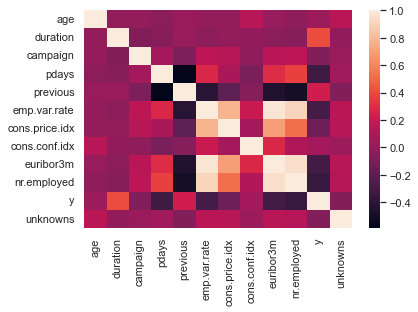

In [19]:
sns.heatmap(full_data.corr());